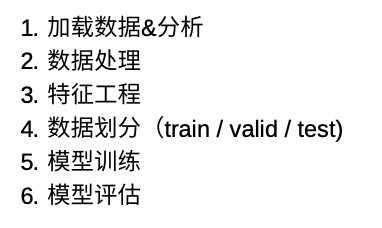

In [2]:
!ls ./house-prices-advanced-regression-techniques

data_description.txt  test.csv
sample_submission.csv train.csv


In [3]:
import pandas as pd
data_path = "house-prices-advanced-regression-techniques"
train_raw, test_raw = pd.read_csv("./{}/train.csv".format(data_path)), pd.read_csv("./{}/test.csv".format(data_path))

In [4]:
train_raw.shape, test_raw.shape

((1460, 81), (1459, 80))

In [5]:
!cat ./house-prices-advanced-regression-techniques/data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [6]:
from IPython.display import display
pd.set_option('display.max_columns', None)
train_raw.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [7]:
## Feature engineering

# 1. drop Id
train_raw.drop("Id", axis=1, inplace=True)
test_raw.drop("Id", axis=1, inplace=True)

# 2. drop features with too much missing values
missing_features = train_raw.columns[train_raw.isnull().mean() > 0.4]
train_raw.drop(missing_features, axis=1, inplace=True)
test_raw.drop(missing_features, axis=1, inplace=True)

In [8]:
train = pd.DataFrame(index = train_raw.index)
test = pd.DataFrame(index = test_raw.index)

In [9]:
# 3. Categorical features
categoritcal_index = train_raw.columns[train_raw.dtypes == "object"].append(pd.Index(["MSSubClass"]))
numerical_index = train_raw.columns[train_raw.dtypes != "object"][1:]

In [10]:
# 4. Fill missing categorical features
train = pd.concat([train, train_raw[categoritcal_index].fillna("NULL")], ignore_index=True, axis=1)
test = pd.concat([test, test_raw[categoritcal_index].fillna("NULL")], ignore_index=True, axis=1)
#train[38] = train[38].astype('object')
#test[38] = test[38].astype('object')

In [11]:
train[38] = train[38].astype('object')
test[38] = test[38].astype('object')

In [12]:
train.shape, test.shape

((1460, 39), (1459, 39))

In [13]:
onehot_df = pd.get_dummies(pd.concat([train,test],ignore_index=True))
#from sklearn.preprocessing import StandardScaler
#onehot_scaler = StandardScaler()
#onehot_df = pd.DataFrame(onehot_scaler.fit_transform(onehot_df),index = onehot_df.index, columns = onehot_df.columns)

In [14]:
train = onehot_df[:1460]
test = onehot_df[1460:]

In [15]:
# 5. Fill missing numerical values & scaling

numerical = pd.concat([train_raw[numerical_index[:-1]],test_raw[numerical_index[:-1]]], ignore_index=True)
numerical = numerical.fillna(numerical.mean())

In [16]:
from sklearn.preprocessing import StandardScaler
numerical_scaler = StandardScaler()
numerical = pd.DataFrame(numerical_scaler.fit_transform(numerical),index = numerical.index, columns = numerical.columns)

In [17]:
numerical_train, numerical_test = numerical[:1460], numerical[1460:]

In [18]:
train = pd.concat([numerical_train, train],axis=1)
test = pd.concat([numerical_test, test],axis=1)

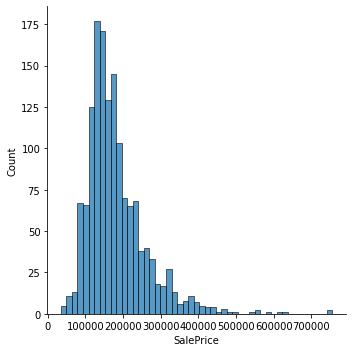

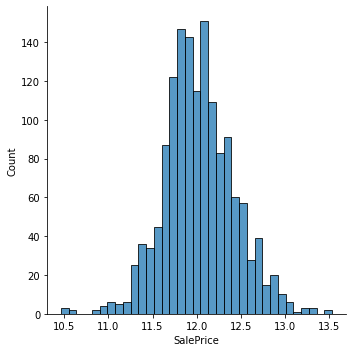

In [19]:
# 6. Target
target = train_raw["SalePrice"]
import seaborn as sns
import numpy as np
target_lp = np.log1p(target)
sns.displot(target)
sns.displot(target_lp)

In [20]:
# 7. Train/Predict
target_scaler = StandardScaler()
t_scaled = target_scaler.fit_transform(target_lp.values.reshape(-1,1))


In [21]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(train, t_scaled)

Ridge()

In [22]:
tpred = np.expm1(target_scaler.inverse_transform(model.predict(train)))

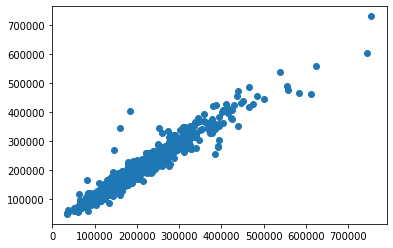

In [23]:
import matplotlib.pyplot as plt
plt.scatter(target.values.reshape(-1), tpred)

In [24]:
# output
res = np.expm1(target_scaler.inverse_transform(model.predict(test)))
outDict = {"Id": test_raw.index+1461, "SalePrice": res.reshape(-1)}
pd.DataFrame(outDict).to_csv("submission.csv",index=False)